# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 
## Homework 2 - Clustering




**Harvard University**<br/>
**Spring 2020**<br/>
**Instructors**: Mark Glickman, Pavlos Protopapas, & Chris Tanner 


<hr style="height:2pt">

### Homework 2 is due February 20th

In [1]:
#PLEASE RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- This is individual homework - No collaboration/Groups
- Problem 1 + Problem 2 = 75 points ; Problem 3 = 25 points
- To submit your assignment, please follow the instructions on Canvas.
- Please restart the kernel and run the entire notebook again before you submit.

<hr style="height:2pt">

### Please use the libraries below:

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hac
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

from sklearn.cluster import KMeans
from gap_statistic import OptimalK
#from sklearn.datasets.samples_generator import make_blobs


<hr style="height:2pt">

<div class="theme">*Handy* Algorithms </div>


    
In this assignment, you will be working with data collected from a motion capture camera system. The system was used to record 14 different users performing 5 distinct hand postures with markers attached to a left-handed glove. A set of markers on the back of the glove was used to establish a local coordinate system for the hand, and 8 additional markers were attached to the thumb and fingers of the glove. A total of 24 features were collected based on observations from the camera system. Two other variables in the dataset were the ID of the user and the posture that the user made.

These data have been preprocessed, including transformation to the local coordinate system of the record, removal of outliers, and removal of missing data.

The dataset `postures_clean.csv` contains 38,943 rows and 26 columns. Each row corresponds to a single frame as captured by the camera system. The data are represented in the following manner:

`Class (type: Integer). The hand posture of the given observation, with`

`1 = Fist (with thumb out)`

`2 = Stop (hand flat)`

`3 = Point1 (point with index finger)`

`4 = Point2 (point with index and middle fingers)`

`5 = Grab (fingers curled as if to grab)`

`User (type: Integer). The ID of the user that contributed the record.`

`X0, Y0, Z0, X1, Y1, Z1,..., X7, Y7, Z7 (type: Real). The x-coordinate, y-coordinate, and z-coordinate of the eight unlabeled marker positions.`


Start by reading the dataset into a pandas data frame.

In [3]:
#your code here
df = pd.read_csv('data/postures_clean.csv')
df

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
0,1,0,72.692270,50.023771,-72.963253,-11.593076,81.234142,-28.450210,51.729995,82.844469,...,-47.909511,10.028439,88.967979,-32.045120,7.732511,25.135415,10.723395,55.943868,19.513363,-70.380124
1,1,0,85.648015,73.561022,-71.838316,31.595034,90.217896,-47.246688,52.230858,82.361548,...,-25.243914,10.277516,88.607958,-32.037539,56.308829,18.774768,-70.996523,6.913199,24.967750,9.697553
2,1,0,-10.346977,81.751331,-25.587870,33.414886,91.985986,-41.364447,5.625100,24.523349,...,-67.660208,87.019172,75.505188,-67.462052,56.807276,20.950953,-68.375831,11.602112,89.400536,-29.062279
3,2,0,63.554969,98.490988,11.165920,49.159831,154.330730,32.004168,92.793124,137.143202,...,-74.307346,58.421362,27.499634,-71.713081,12.660462,95.077144,29.664434,84.110115,151.545456,16.891147
4,2,0,80.873812,93.722537,-4.988816,63.572103,98.476638,11.242908,49.142700,154.347050,...,-71.629823,20.573646,132.913455,35.349247,92.942044,137.182817,1.297511,35.480104,99.739019,22.802243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38938,5,14,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,...,-32.792393,77.293710,34.070857,-43.263790,-30.282201,77.622306,-17.150292,-22.833830,104.593913,-53.126136
38939,5,14,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,...,-33.851425,-1.090674,122.724914,-46.558373,-1.958502,98.288931,4.248334,61.390015,101.468284,-5.985371
38940,5,14,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,...,-34.441463,61.475331,101.321181,-6.616988,-1.125738,122.614027,-46.796054,88.291029,60.362768,-62.718735
38941,5,14,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,...,-54.334623,61.639386,101.224662,-6.840942,54.009962,129.477879,-43.967820,-1.581415,98.017411,3.394291


In [4]:
df.describe()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
count,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,...,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000
mean,3.533986,8.149501,51.392252,93.748418,-18.956761,48.644293,97.228337,-16.921813,46.432265,97.351512,...,-18.446645,45.392642,93.295433,-19.125065,45.201114,90.839851,-19.920157,44.463433,88.463343,-20.368719
std,1.332452,4.587195,34.070402,40.145995,34.976568,34.922596,38.076977,34.671422,36.395332,37.470755,...,35.597032,37.104094,39.746619,35.602273,37.556616,40.227409,34.827888,38.378395,40.503378,33.943957
min,1.000000,0.000000,-108.552738,-67.157904,-120.284665,-111.685241,-65.758453,-120.290858,-99.917453,-64.830342,...,-157.199089,-99.014815,-64.282645,-118.328399,-100.084275,-67.283707,-153.449813,-108.605639,-64.972157,-113.733105
25%,2.000000,5.000000,28.169252,74.946345,-43.598807,22.574182,79.747406,-41.210343,17.617698,81.302159,...,-45.169035,15.849890,76.376404,-46.363837,15.132050,68.915784,-46.547792,13.081363,63.541846,-45.676522
50%,4.000000,9.000000,54.596564,93.966079,-15.041397,52.960933,96.690641,-12.046916,51.184849,97.222693,...,-14.823751,50.160084,97.040377,-16.010237,49.968499,95.562441,-17.101080,49.601058,93.796334,-19.428819
75%,5.000000,12.000000,77.390834,130.932659,7.998678,75.560564,131.729311,9.065824,74.435194,130.794462,...,9.382799,73.761617,126.844621,9.031498,74.558859,123.069653,7.767866,75.721811,119.188963,6.591351
max,5.000000,14.000000,160.850926,169.175464,113.345119,158.783454,170.209350,104.697852,163.547310,168.186466,...,119.237203,180.563322,167.926171,110.898899,176.409004,168.598384,117.914907,189.221529,169.127359,117.815967


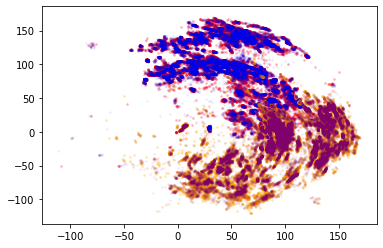

In [5]:
plt.scatter(df.X0, df.Y0, c='red',s=3,alpha=0.2)
plt.scatter(df.X1, df.Y1, c='b', s=3, alpha=0.05)
plt.scatter(df.Y0, df.Z0, c='orange', s=3, alpha=0.2)
plt.scatter(df.Y1, df.Z1, c='purple', s=3, alpha=0.05)
# plt.scatter(df.X0, df.Z0, c='red', s=3, alpha=0.05)
plt.show()

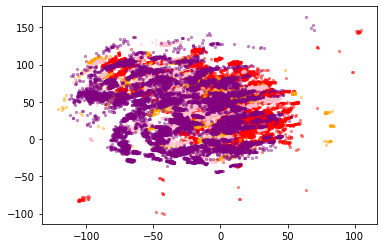

In [6]:
colors=['b','r','orange','pink','purple']
for i in df.Class.unique():
    plt.scatter(df[df['Class']==i].Z2, df[df['Class']==i].X2, c=colors[i-1], s=5, alpha=0.4)
plt.show()

<div class='exercise'>Problem 1: Clustering with k-means </div>

(a) After appropriate pre-processing (but not scaling) run the k-means clustering algorithm, using the `KMeans` class from sklearn.cluster, with the number of clusters corresponding to the number of users, `n_init` of 46, and 109 as the random seed. Add the result as a new column called `Cluster14` to your data frame.

In [14]:
#your code here
# remove User/Class column
df_coord = df[list(df.columns.drop(['User','Class']))]
df_coord

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
0,72.692270,50.023771,-72.963253,-11.593076,81.234142,-28.450210,51.729995,82.844469,-55.674024,86.175444,...,-47.909511,10.028439,88.967979,-32.045120,7.732511,25.135415,10.723395,55.943868,19.513363,-70.380124
1,85.648015,73.561022,-71.838316,31.595034,90.217896,-47.246688,52.230858,82.361548,-55.975665,74.817984,...,-25.243914,10.277516,88.607958,-32.037539,56.308829,18.774768,-70.996523,6.913199,24.967750,9.697553
2,-10.346977,81.751331,-25.587870,33.414886,91.985986,-41.364447,5.625100,24.523349,8.120352,52.961965,...,-67.660208,87.019172,75.505188,-67.462052,56.807276,20.950953,-68.375831,11.602112,89.400536,-29.062279
3,63.554969,98.490988,11.165920,49.159831,154.330730,32.004168,92.793124,137.143202,1.064904,80.854870,...,-74.307346,58.421362,27.499634,-71.713081,12.660462,95.077144,29.664434,84.110115,151.545456,16.891147
4,80.873812,93.722537,-4.988816,63.572103,98.476638,11.242908,49.142700,154.347050,32.076937,95.211973,...,-71.629823,20.573646,132.913455,35.349247,92.942044,137.182817,1.297511,35.480104,99.739019,22.802243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38938,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,-46.460186,-1.901940,...,-32.792393,77.293710,34.070857,-43.263790,-30.282201,77.622306,-17.150292,-22.833830,104.593913,-53.126136
38939,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,-17.002723,-22.743924,...,-33.851425,-1.090674,122.724914,-46.558373,-1.958502,98.288931,4.248334,61.390015,101.468284,-5.985371
38940,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,-53.939140,-30.225675,...,-34.441463,61.475331,101.321181,-6.616988,-1.125738,122.614027,-46.796054,88.291029,60.362768,-62.718735
38941,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,-17.460853,26.715915,...,-54.334623,61.639386,101.224662,-6.840942,54.009962,129.477879,-43.967820,-1.581415,98.017411,3.394291


In [15]:
# KMeans to cluster data
ms_kmeans = KMeans(n_clusters=14, init='random', n_init=46, random_state=109).fit(df_coord)

In [19]:
# add the labels to the dataframe
df_coord['Cluster14']=ms_kmeans.labels_
df_coord

C:\Program Files\B-Programming\Anaconda3\envs\cs109b\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,...,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,Cluster14
0,72.692270,50.023771,-72.963253,-11.593076,81.234142,-28.450210,51.729995,82.844469,-55.674024,86.175444,...,10.028439,88.967979,-32.045120,7.732511,25.135415,10.723395,55.943868,19.513363,-70.380124,9
1,85.648015,73.561022,-71.838316,31.595034,90.217896,-47.246688,52.230858,82.361548,-55.975665,74.817984,...,10.277516,88.607958,-32.037539,56.308829,18.774768,-70.996523,6.913199,24.967750,9.697553,9
2,-10.346977,81.751331,-25.587870,33.414886,91.985986,-41.364447,5.625100,24.523349,8.120352,52.961965,...,87.019172,75.505188,-67.462052,56.807276,20.950953,-68.375831,11.602112,89.400536,-29.062279,10
3,63.554969,98.490988,11.165920,49.159831,154.330730,32.004168,92.793124,137.143202,1.064904,80.854870,...,58.421362,27.499634,-71.713081,12.660462,95.077144,29.664434,84.110115,151.545456,16.891147,5
4,80.873812,93.722537,-4.988816,63.572103,98.476638,11.242908,49.142700,154.347050,32.076937,95.211973,...,20.573646,132.913455,35.349247,92.942044,137.182817,1.297511,35.480104,99.739019,22.802243,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38938,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,-46.460186,-1.901940,...,77.293710,34.070857,-43.263790,-30.282201,77.622306,-17.150292,-22.833830,104.593913,-53.126136,8
38939,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,-17.002723,-22.743924,...,-1.090674,122.724914,-46.558373,-1.958502,98.288931,4.248334,61.390015,101.468284,-5.985371,13
38940,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,-53.939140,-30.225675,...,61.475331,101.321181,-6.616988,-1.125738,122.614027,-46.796054,88.291029,60.362768,-62.718735,13
38941,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,-17.460853,26.715915,...,61.639386,101.224662,-6.840942,54.009962,129.477879,-43.967820,-1.581415,98.017411,3.394291,13


(b) Use the function below to visualize the results for k-means on a random sample of 2,000 observations (it will take the sample for you). Does 14 clusters seem to make sense?

In [23]:
from sklearn.decomposition import PCA

def plot_clusters(full_data, group_col, scaling_mode):
    marker_types = [".", "v", "1", "^", "s", "p", "P", "3", "H", "<", "|", "_", "x", "*"]
    marker_colors = np.concatenate([np.array(plt.cm.tab10.colors),np.array(plt.cm.Pastel1.colors)])
    
    feature_columns = [colname for colname in list(full_data.columns) if colname not in {'Class','User','Cluster14','Cluster5'}]
    features_only = full_data[feature_columns]
    
    # make a scaled df if needed, (but don't scale cluster labels)
    if scaling_mode == True:
        scaler = StandardScaler()
        scaled_features = pd.DataFrame(scaler.fit_transform(features_only), columns=feature_colummns)
    elif scaling_mode == False:
        scaled_features = features_only
    else:
        raise ValueError("Unexpected value for scaling_mode")

    # fit PCA to the whole scaled data
    fitted_pca = PCA().fit(scaled_features)

    # take a sample of the whole scaled data
    scaled_sample = scaled_features.sample(2000, random_state=109)

    # apply the PCA transform on the sample
    pca_sample = pd.DataFrame(fitted_pca.transform(scaled_sample), columns = ["PCA{}".format(i) for i in range(len(scaled_sample.columns.values))])
    pca_sample.index = scaled_sample.index ### New statement!!!!!
    
    # re-include a cluster label for the pca data
    if 'Cluster14' in full_data.columns.values:
        pca_sample['Cluster14'] = full_data.loc[pca_sample.index, "Cluster14"]
    if 'Cluster5' in full_data.columns.values:
        pca_sample['Cluster5'] = full_data.loc[pca_sample.index, "Cluster5"]
    
    plt.figure(figsize=(11,8.5))
    for i, (cluster_id, cur_df) in enumerate(pca_sample.groupby([group_col])):

        pca1_scores = cur_df.iloc[:,0]
        pca2_scores = cur_df.iloc[:,1]
        plt.scatter(pca1_scores, pca2_scores, label=cluster_id, c=marker_colors[i].reshape(1,-1), marker=marker_types[i])

    plt.xlabel("PC1 ({}%)".format(np.round(100*fitted_pca.explained_variance_ratio_[0],1)))
    plt.ylabel("PC2 ({}%)".format(np.round(100*fitted_pca.explained_variance_ratio_[1],1)))
    plt.legend()
    plt.show()

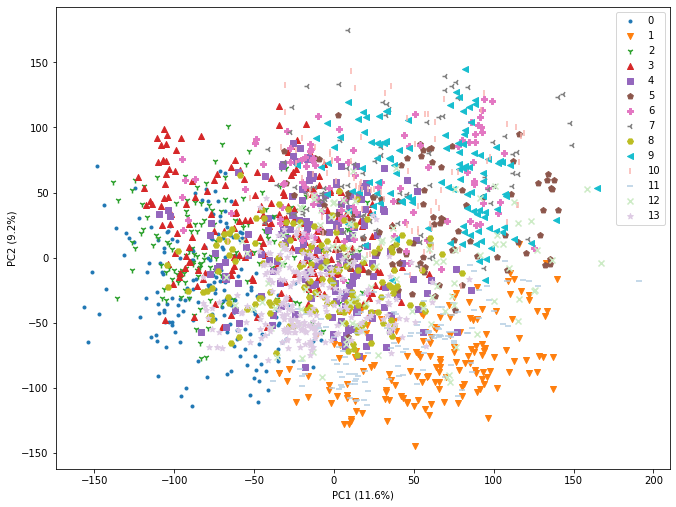

In [24]:
#your code here
plot_clusters(df_coord, 'Cluster14', False)

**your response here**

**It seems that even though the blue and orange clusters are separable from the main point clouds, but most of the clusters are mixed together. In the graph, the points don't actually form clearly divided groups.**

(c) Plot the silhouette scores using the function below, from lecture. Give it a 10% sample of the data to speed the visualization. How reasonable does the clustering seem based on this plot? How does it compare to the information in the plot above?

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
#modified code from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

def silplot(X, cluster_labels, clusterer, pointlabels=None):
    n_clusters = clusterer.n_clusters
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(11,8.5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = ", n_clusters,
          ", the average silhouette_score is ", silhouette_avg,".",sep="")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(0,n_clusters+1):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=200, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    xs = X[:, 0]
    ys = X[:, 1]
    
    if pointlabels is not None:
        for i in range(len(xs)):
            plt.text(xs[i],ys[i],pointlabels[i])

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % int(i), alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [52]:
sample=df_coord.sample(frac=0.1, random_state=109)
labels=ms_kmeans.labels_[sample.index]
# print(sample.shape, labels.shape)
# print(ms_kmeans.labels_[sample.index])
# print(sample.index)

For n_clusters = 14, the average silhouette_score is 0.06676340080905636.


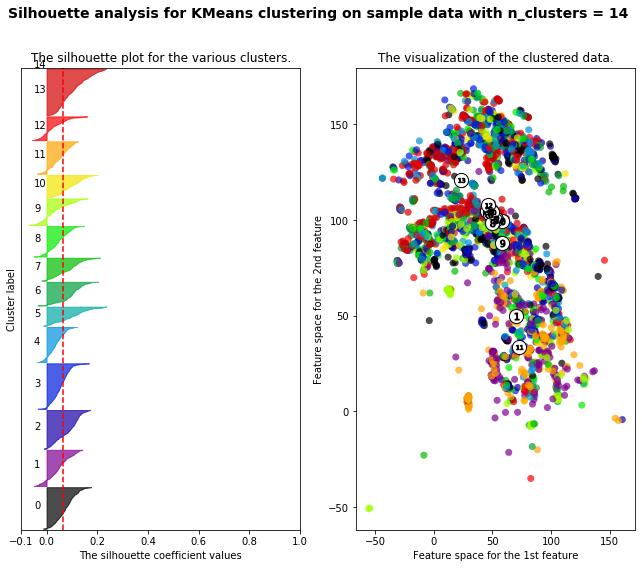

In [53]:
silplot(sample.values, labels, ms_kmeans)

For n_clusters = 14, the average silhouette_score is 0.06824461618789804.


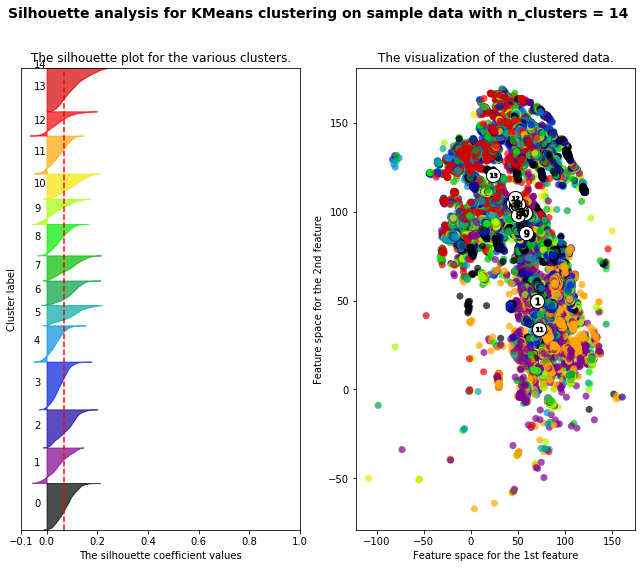

In [26]:
# plot all data (above only shows 10% of the data)
silplot(df_coord.values, ms_kmeans.labels_, ms_kmeans)

**your response here**

From silhouette plot, we can tell using 14 clusters leads to pretty bad results. All the clusters have very wide fluctuations in the size of the clusters in the silhouette plot and most of the clusters even have silhouette score below 0, which indicates the points are wrongly clustered. 

From the visualization, we can see the points are mixed together completely. 

Using user number to cluster the data seems a bad idea.

*****************************************************


(d) Repeat all of the above steps, but attempting to group by posture rather than by user. That is : 

(i) Run the k-means algorithm with 5 centroids instead of 14, creating a variable named `Cluster5` and adding it to the dataset. 

(ii) Visualize the results for k-means. Does 5 clusters seem to make sense from this plot?

(iii) Plot the silhouette scores on a 10% sample of the data. How reasonable does the clustering seem based on this plot?

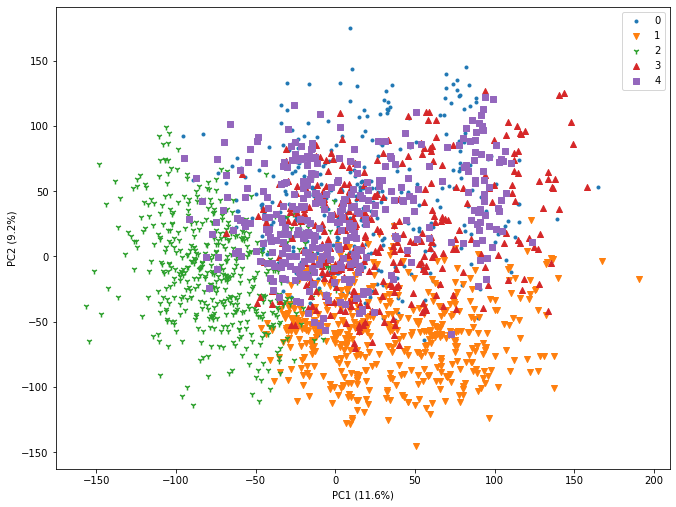

In [30]:
#your code here
# recluster into 5 groups
ms_5 = KMeans(n_clusters=5, init='random', n_init=46, random_state=109).fit(df_coord)

# add labels to the new column
df_coord['Cluster5']= ms_5.labels_

# visualize kmeans
plot_clusters(df_coord, 'Cluster5', False)

**your response here**

Compared to using users as the size of clusters, using the number of classes seems to make more sense. In the plot above, even though the clusters still overlap with each other, we can see the points do form densely distributed clusters. The overlapping issue might lie in the nature of the data since the gestures look really similar to each other.


For n_clusters = 5, the average silhouette_score is 0.07005032055910491.


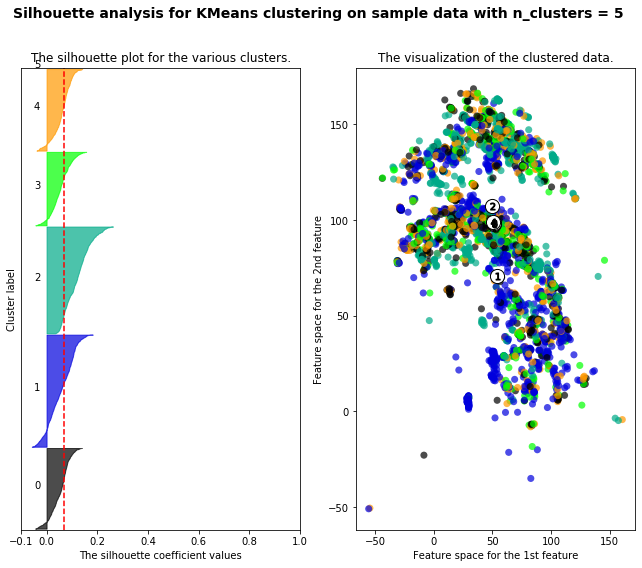

In [55]:
#your code here
# plot silhouette scores
sample_cluster5=df_coord.sample(frac=0.1, random_state=109)
labels_5=ms_5.labels_[sample_cluster5.index]
silplot(sample_cluster5.values, labels_5, ms_5)

**your response here**

The silhouette plot shows a better result than previously since all the clusters have a less violent fluctuation in the value. But there are still negative scores in each cluster which indicates some points are stil wrongly clustered. From the plot on the right, we can barely tell the clusters. This might be the result of not using PCA to show the most important two features but just using randomly selected variables.


(e) What do the results suggest? Does this make sense in the context of what we know about the problem?

**your response here**

It shows that using the number of gestures to cluster gives us a better result than using the number of users. It matches with our common sense as well since the difference between the same gesture made by different individuals is obviously less obvious than the difference between different gestures.

It also shows us that even using number 5 to cluster, the points are still not divided into clearly separable groups. The reason behind it might be that this dataset itself is not separable. It makes sense since the gestures have very little difference between each other which even human cannot tell if they don't look carefully.

<div class='exercise'> <b> Problem 2: Other Ks  </b> </div>

In the previous problem, we examined the results of running k-means with 5 and 14 centroids on the postures data. In this problem, we will investigate a broader range of possible cluster sizes, with a borader range of metrics. 

**For all of these questions, you should work with a sample of 2,000 data points drawn with `pd.sample` and a random seed of 109.**

(a) Use the elbow method to evaluate the best choice of the number of clusters, plotting the total within-cluster variation against the number of clusters, for k-means clustering with $k \in \{1,2,...,15\}.$
 

In [37]:
#your code here
# get a sample of the dataset
# df_sample = df_coord.drop(['Cluster14', 'Cluster5']).sample(frac=0.1, random_state=109)
df_sample = df_coord.drop(columns=['Cluster14', 'Cluster5']).sample(frac=0.1, random_state=109)
df_sample

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
6091,84.975631,135.157968,0.178227,102.782250,65.801284,-54.513788,96.923428,43.560158,-53.742457,0.666182,...,-103.248612,71.888221,86.550350,-9.536883,62.418378,150.673209,13.239986,31.619131,147.040932,20.974022
67,97.433559,73.307004,-70.852885,12.156341,94.997037,28.826597,49.407735,154.347202,31.488403,58.952465,...,10.082917,91.896413,137.364909,-0.970175,80.472245,54.351745,-70.605996,20.571867,132.825532,34.975527
8012,66.584725,46.384115,-85.188064,6.417817,23.900917,-72.658238,47.718854,76.387780,-28.376677,68.222548,...,-53.845827,22.144660,14.845352,-93.399754,69.243961,-13.336629,-66.483108,70.714691,21.613013,-77.362953
26953,60.888382,98.631195,1.707138,2.248525,134.548736,-45.176243,68.078873,136.256709,-16.449734,107.181168,...,-6.873774,-30.707140,77.683370,-36.692417,28.765452,152.542379,-11.494678,27.421120,103.263994,5.977052
1353,72.107228,145.244069,30.989621,73.528040,91.964579,-7.215141,86.544493,130.280675,13.822065,24.536348,...,-73.854833,54.347663,97.043482,8.503677,101.116836,35.416703,-86.420456,80.307180,33.218181,-83.138723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25074,83.099355,131.876962,-7.483198,23.329085,141.179738,26.604655,15.156587,95.589632,10.707958,70.751727,...,13.736859,85.702303,32.275881,-59.965666,56.570367,146.384780,15.500220,70.047547,94.504697,-6.458798
9347,-16.907654,95.095031,-15.209963,16.595483,157.385885,16.957451,34.312121,143.749605,11.748506,37.251713,...,4.128658,92.185402,45.395922,-32.147816,57.746508,24.233019,-48.479116,73.933858,39.128220,-41.384175
13728,78.857280,87.007276,-20.359384,-12.791271,93.526252,0.062036,76.195237,82.573817,-84.264160,15.623380,...,-0.159806,15.526143,97.021203,8.732778,76.907617,56.159120,-82.363797,50.316246,144.267253,-30.541992
23501,96.081055,52.374546,-97.264541,29.502611,7.953718,9.859380,96.859188,30.876738,-82.388421,30.773092,...,-61.533896,3.946079,95.828493,-78.005583,-11.942161,82.496486,-70.961209,82.122108,101.735765,-18.134622


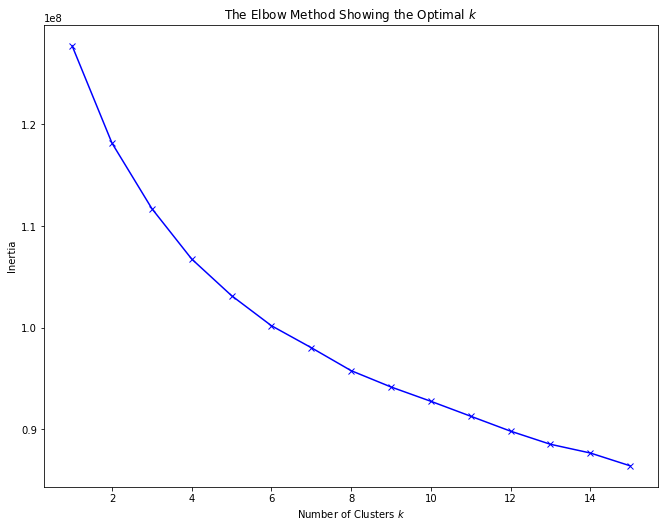

In [38]:
# elbow 
wss=[]
for i in range(1,16):
    fitx=KMeans(n_clusters=i, init='random', n_init=46, random_state=109).fit(df_sample)
    wss.append(fitx.inertia_)
    
plt.figure(figsize=(11,8.5))
plt.plot(range(1,16), wss, 'bx-')
plt.xlabel('Number of Clusters $k$')
plt.ylabel('Inertia')
plt.title('The Elbow Method Showing the Optimal $k$')
plt.show()

(b) Use the average silhouette to evaluate the choice of the number of clusters for k-means clustering with $k \in \{1,2,...,15\}$. Plot the results. 

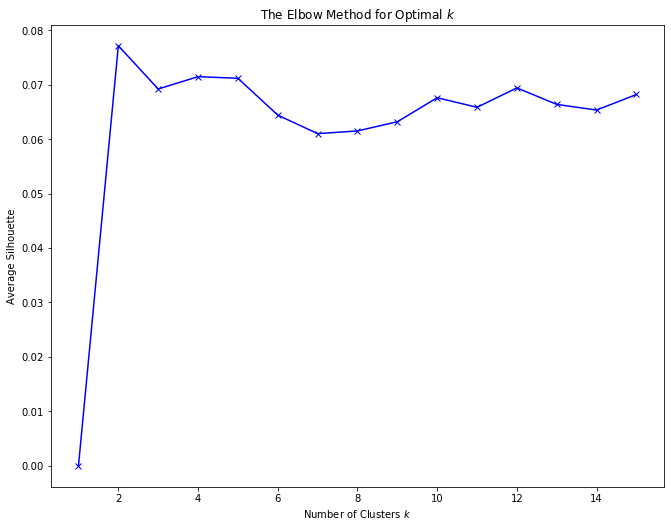

In [39]:
#your code here
score = [0]
for i in range(2, 16):
    fitx=KMeans(n_clusters=i, init='random', n_init=46, random_state=109).fit(df_sample)
    score.append(silhouette_score(df_sample, fitx.labels_))

plt.figure(figsize=(11, 8.5))
plt.plot(range(1,16), score, 'bx-')
plt.xlabel('Number of Clusters $k$')
plt.ylabel('Average Silhouette')
plt.title('The Elbow Method for Optimal $k$')
plt.show()
    

(c) Use the gap statistic to evaluate the choice of the number of clusters for k-means clustering with $k \in \{1,2,..,15\}$. Plot the results. 

In [56]:
np.arange(1,15)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [57]:
#your code here
# construct optimalk object
gs_obj=OptimalK()
n_clusters=gs_obj(df_sample.values,n_refs=50, cluster_array=np.arange(1,16))
print('Optimal cluster:', n_clusters)

Optimal cluster: 15


In [58]:
# plot results
gs_obj.gap_df

,n_clusters,gap_value,gap*,ref_dispersion_std,diff,diff*
0,1.0,-9.704839,-1.277243e+08,23.122492,-0.043482,1.098712e+08
1,2.0,-9.658413,-1.182097e+08,22.009174,-0.024805,1.080118e+08
2,3.0,-9.629976,-1.125507e+08,26.622904,-0.021115,1.044593e+08
3,4.0,-9.605305,-1.079679e+08,25.605126,-0.018287,1.012560e+08
4,5.0,-9.584304,-1.040941e+08,19.255777,-0.015673,9.859623e+07
5,6.0,-9.565518,-1.008434e+08,21.786355,-0.003434,9.851399e+07
6,7.0,-9.559231,-9.918523e+07,19.767091,-0.005888,9.624388e+07
7,8.0,-9.549937,-9.723081e+07,23.336372,0.000993,9.604773e+07
8,9.0,-9.547952,-9.616085e+07,20.235210,-0.017696,9.154452e+07
9,10.0,-9.527086,-9.338805e+07,21.358682,0.001622,9.261283e+07


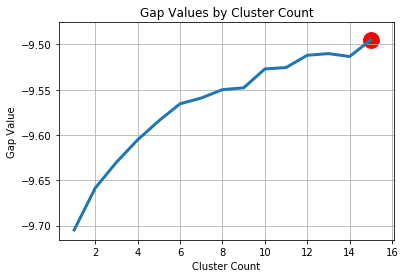

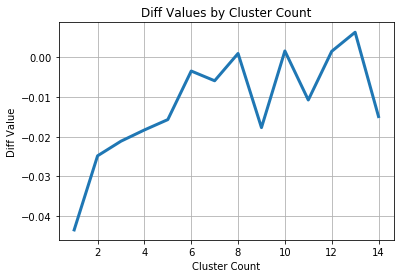

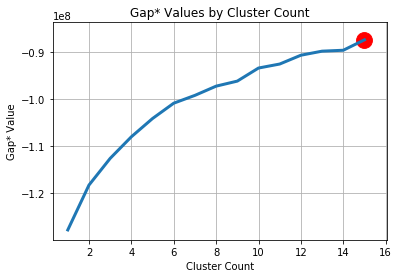

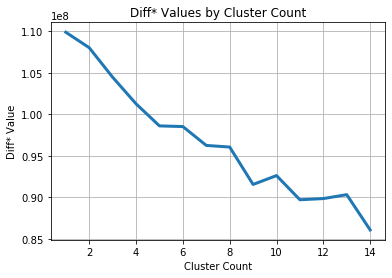

In [59]:
gs_obj.plot_results()

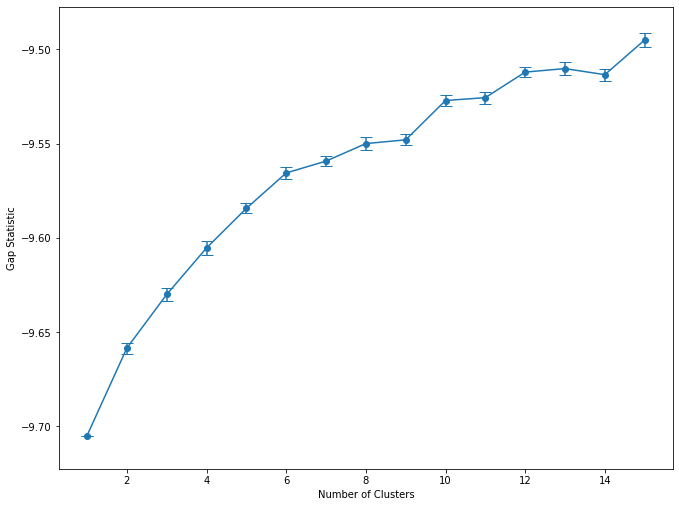

In [72]:
def display_gapstat_with_errbars(gap_df):
    gaps = gap_df["gap_value"].values
    diffs = gap_df["diff"]
    
    err_bars = np.zeros(len(gap_df))
    err_bars[1:] = diffs[:-1] - gaps[:-1] + gaps[1:]

    plt.figure(figsize=(11,8.5))
    plt.scatter(gap_df["n_clusters"], gap_df["gap_value"])
    plt.errorbar(gap_df["n_clusters"], gap_df["gap_value"], yerr=err_bars, capsize=6)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Gap Statistic")
    plt.show()
    
display_gapstat_with_errbars(gs_obj.gap_df)

(d) After analyzing the plots produced by all three of these measures, discuss the number of k-means clusters that you think is the best fit for this dataset. Defend your answer with evidence from the previous parts of this question, the three graphs produced here, and what you surmise about this dataset.

**your response here**

**KMeans**
In the KMeans plot, it shows that numbers between 4-7 might be a good fit for the number of clusters since the return diminishes after 7. Adding more clusters after 7 doesn't help increase inertia much.

**Silhouette**
The silhouette plot shows that we should choose number 2, or numbers between 2-5. Because the higher the silhouette score is, the better cluster results we would get by using that number. However, there is one thing that needs to be pointed out. Actually all the scores fall in the range between 0.06-0.8, which are all far below 1 (the perfect silhouette score). It might show that all these numbers are bad choice. It is just numbers between 2-5 are slightly better.

**Gap Statistic**
From the gap statistic, based on the rule that Gap(k)>Gap(k+1)-s(k+1), we can select 12-14 as our cluster number. It seems that around that range, the gap statistics rejects the null hypothesis, which means numbers that fall in this range work the best for clustering.


<div class='exercise'> <b> Problem 3: Alternative Algorithms  </b> </div>

(e) Run DBSCAN on the data. How many clusters are found, and how well does this clustering perform on e.g. silhouette score, excluding the points not assigned to any cluster?  
*Note*: Do not use a sample of the data. Running the algorithm may take up to 5-10 minutes.

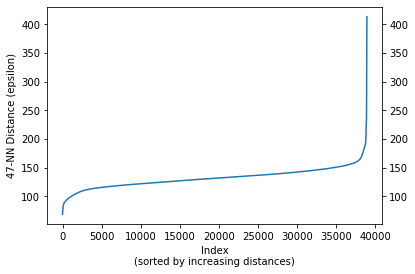

In [74]:
#your code here
# drop unnecessary columns
df_dbscan=df_coord.drop(columns=['Cluster14', 'Cluster5'])

# find the best epsilon
from sklearn.neighbors import NearestNeighbors
def plot_epsilon(df, min_samples):
    fitted_neigbors = NearestNeighbors(n_neighbors=min_samples).fit(df)
    distances, indices = fitted_neigbors.kneighbors(df)
    dist_to_nth_nearest_neighbor = distances[:,-1]
    plt.plot(np.sort(dist_to_nth_nearest_neighbor))
    plt.xlabel("Index\n(sorted by increasing distances)")
    plt.ylabel("{}-NN Distance (epsilon)".format(min_samples-1))
    plt.tick_params(right=True, labelright=True)
    
# here using [feature number]*2
plot_epsilon(df_dbscan, min_samples=48)

In [75]:
# based on the plot above, we should select roughly 160 as our epsilon
fitted_dbscan = DBSCAN(eps=160).fit(df_dbscan)

In [78]:
df_dbscan['label']=fitted_dbscan.labels_
df_dbscan['label'].unique()   # get 3 clusters here, but the clusters are greatly imbalanced in amount

array([ 0, -1,  1,  2], dtype=int64)

In [83]:
# check noise points
df_dbscan[df_dbscan['label']==-1]

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,...,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,label
1017,3.788074,-67.157904,17.991360,-111.685241,-28.241055,45.628993,-12.574831,-23.181158,20.795508,23.285343,...,-67.788204,59.083730,63.789020,-64.576336,80.977851,43.662781,-108.605639,-50.233962,55.411863,-1
1018,-108.552738,-50.018194,53.700116,22.460792,-65.758453,4.790407,-67.747232,59.076911,63.509611,-111.761053,...,-12.587259,-23.216008,20.311660,3.781327,-67.283707,17.843949,-64.549751,80.964324,43.642563,-1
1023,56.500680,20.127956,28.708194,126.152692,-10.073018,67.452886,10.460513,71.823278,52.831472,-8.460255,...,129.044270,30.838843,100.442292,19.469473,50.563312,42.065693,98.732670,103.416099,81.911444,-1
1024,125.658771,-11.221979,69.007037,9.793048,70.309208,54.207000,55.880464,19.824313,30.344140,-10.040791,...,98.736040,101.806101,85.041231,126.780481,28.753997,103.949593,123.581394,4.480388,82.746733,-1
1025,7.295362,68.172811,57.149816,126.099425,-13.260574,69.500037,54.214515,18.904711,32.453763,-15.438379,...,118.731703,1.034650,86.990605,75.034880,110.594687,111.007367,123.962456,25.156720,107.421144,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29123,50.922023,-34.969219,-4.566959,-97.264550,-8.015231,-47.159353,-52.192104,-49.324934,-45.663788,-48.078142,...,-62.866593,30.505586,11.835701,24.470918,-64.547689,-9.575675,-71.957207,51.476458,16.463665,-1
29124,45.414434,-57.268995,-9.574842,-52.375276,-49.977721,-45.515612,-64.671538,27.961625,13.278949,-70.568284,...,-72.019544,51.700191,16.055177,-50.091710,38.888263,11.502088,-7.259960,-22.082622,-6.165941,-1
29125,-21.671963,-39.069919,-14.941658,-63.400577,29.950954,11.384270,-6.525369,-21.273752,-7.000639,25.426412,...,-96.142001,-6.877429,-49.488750,51.147987,-34.509147,-4.617320,-48.201859,41.753817,8.995284,-1
29126,50.707586,-35.250383,-4.319198,-70.667270,-33.991539,-46.374887,45.528284,-57.306647,-9.657963,-52.508157,...,-22.758893,-41.121095,-13.412514,-50.137024,38.551293,11.384273,-82.107642,20.844166,13.739025,-1


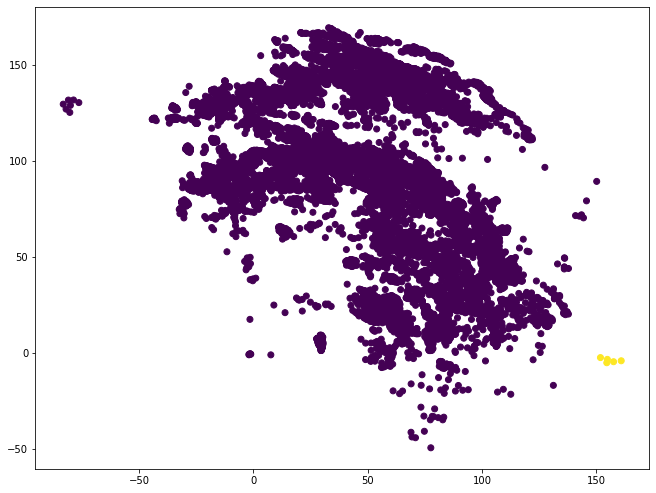

In [87]:
# plot the clusters
plt.figure(figsize=(11, 8.5))
dbscan_withoutnoise=df_dbscan[df_dbscan['label']!=-1]  # filter out the nodes without assigned cluster label: label=-1
db_label=fitted_dbscan.labels_[dbscan_withoutnoise.index]
plt.scatter(dbscan_withoutnoise['X0'], dbscan_withoutnoise['Y0'], c=db_label)
plt.show()

For n_clusters = 3, the average silhouette_score is 0.06465491506721792.


Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with n_clusters = 3')

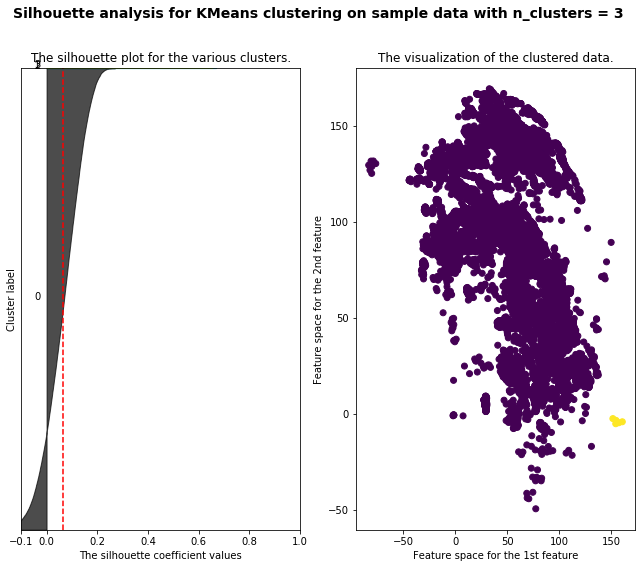

In [98]:
# plot silhouette score
n_clusters = len(dbscan_withoutnoise['label'].unique())

# n_clusters = clusterer.n_clusters

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(11,8.5)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])

# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(dbscan_withoutnoise) + (n_clusters + 1) * 10])

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(dbscan_withoutnoise, db_label)
print("For n_clusters = ", n_clusters,
      ", the average silhouette_score is ", silhouette_avg,".",sep="")

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(dbscan_withoutnoise, db_label)

y_lower = 10
for i in range(0,n_clusters+1):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[db_label == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
# colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
# ax2.scatter(X[:, 0], X[:, 1], marker='.', s=200, lw=0, alpha=0.7,
#             c=colors, edgecolor='k')
# xs = X[:, 0]
# ys = X[:, 1]

# if pointlabels is not None:
#     for i in range(len(xs)):
#         plt.text(xs[i],ys[i],pointlabels[i])

# # Labeling the clusters
# centers = clusterer.cluster_centers_
# # Draw white circles at cluster centers
# ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#             c="white", alpha=1, s=200, edgecolor='k')

# for i, c in enumerate(centers):
#     ax2.scatter(c[0], c[1], marker='$%d$' % int(i), alpha=1,
#                 s=50, edgecolor='k')

ax2.scatter(dbscan_withoutnoise['X0'], dbscan_withoutnoise['Y0'], c=db_label)

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % n_clusters),
             fontsize=14, fontweight='bold')

plt.show()

There are 3 clusters found using DBSCAN (if we use eps=160 and min_sample=default). But based on the silhouette score, DBSCAN does a pretty bad job here for the score has an extremely wide range of fluctuations. Also, the clusters are imbalanced with the largest cluster containing almost all the points.

(f) Hierarchical clustering. Run agglomerative clustering (using Ward's method), and plot the result using a dendrogram. Interpret the results, and describe the cluster size(s) the plot suggests. What level of aggregation is suggested by the sihoutte score?

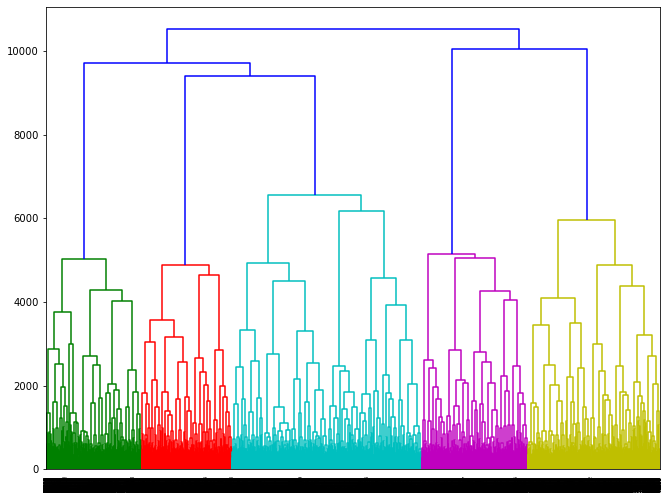

In [92]:
#your code here
plt.figure(figsize=(11, 8.5))
df_tree=df_dbscan.drop(columns=['label'])
dist_mat=pdist(df_tree, metric='euclidean')
ward_data=hac.ward(dist_mat)

hac.dendrogram(ward_data);  # this ; is important for not showing all the ugly details

**your response here**

It seems that the dendro plot suggests to take 5 as the cluster size (since the points are divided into 5 different color groups).

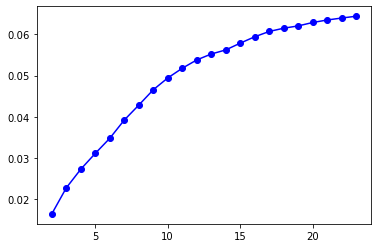

In [101]:
#your code here
silscore_dendro=[]
for i in range(2, 24):
    labellings = hac.fcluster(ward_data, t=i, criterion='distance')
    score=silhouette_score(df_tree, labellings)
    silscore_dendro.append(score)

# sorry this block runs forever, I don't have time to rerun it. so i just leave the raw plot here. a better defined one is below

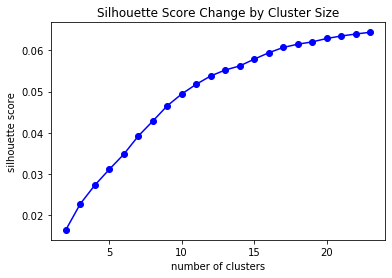

In [102]:
plt.plot(range(2,24), silscore_dendro,'bo-')
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.title('Silhouette Score Change by Cluster Size')
plt.show()

**your response here**

However, if we calculate the silhouette score for n_clusters = [2,24], we can find that the silhouette score seems to keep increase which means the more the merrier. But after number 10, it hits the diminishing return point. 

Therefore, we should choose 10 as the size of clusters based on the silhouette scores.

(g) Overall, what do you conclude about the number and kind of clusters in this data set?

**your response here**

Overall, it seems that hierachy cluster outperforms KMeans, and KMeans outperforms DBSCAN in this context. Since we know beforehand that cluster size as 5 reflects better on the number of gestures, we know which algorithm actually gives us results closer to the actual clustering. In reality, without knowing the actual class information, I am not sure which algorithm would work better in this situation.

By comparing Inertia, silhouette score and gap statistics, it seems that we should choose cluster size between 3-7,even though all cluster sizes have very little difference between them.

Lastly, I feel hierachy cluster algorithm works the best since the result is the closest to the reality, but it is extremely expensive to compute. and the data is not that separable due to the unrecognizable nature of the gestures.
